In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Attrition.csv')

cluster_cols = ['TotalWorkingYears', 'MonthlyIncome', 'JobSatisfaction']
X_cluster = df[cluster_cols].copy()

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("Data scaled and ready for clustering.\n")

Data scaled and ready for clustering.



Running Elbow Method (1 to 10 clusters)...


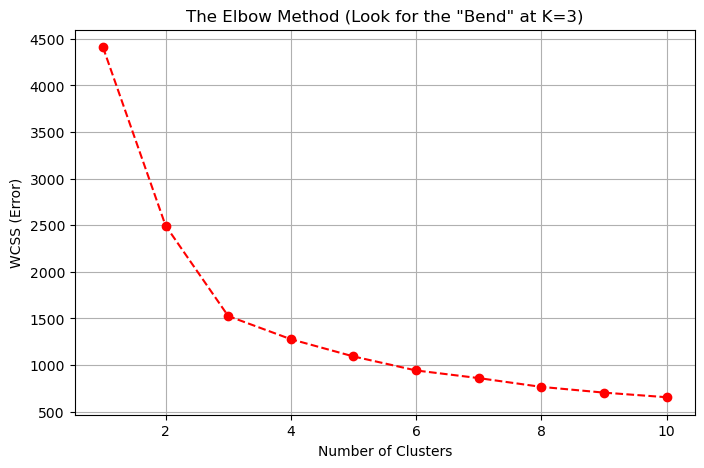

In [4]:
wcss = []
print("Running Elbow Method (1 to 10 clusters)...")

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)   
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title('The Elbow Method (Look for the "Bend" at K=3)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Error)')
plt.grid()
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

print("\n---Cluster Profiles ---")
profile = df.groupby('Cluster')[cluster_cols].mean().round(2)
print(profile)


---Cluster Profiles ---
         TotalWorkingYears  MonthlyIncome  JobSatisfaction
Cluster                                                   
0                     8.61        4728.97             1.49
1                     8.47        4697.75             3.52
2                    24.47       15087.28             2.70


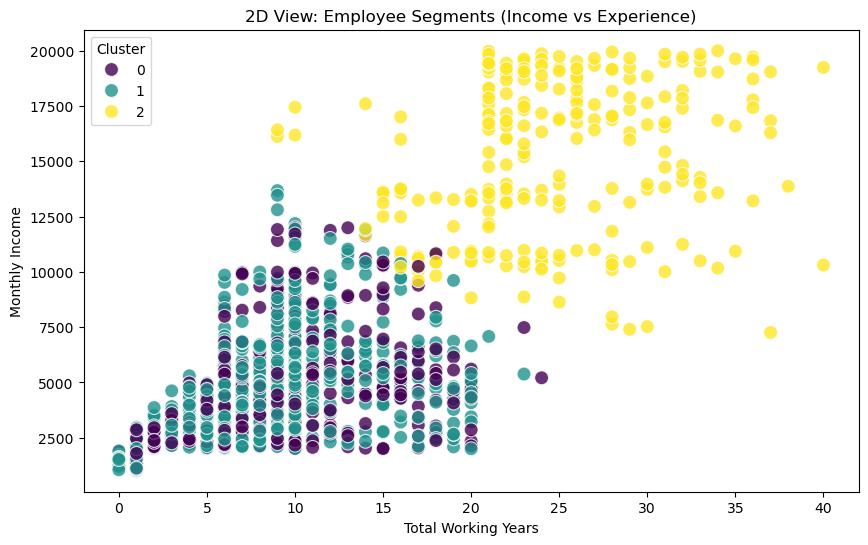

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome', 
                hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title("2D View: Employee Segments (Income vs Experience)")
plt.xlabel("Total Working Years")
plt.ylabel("Monthly Income")
plt.legend(title='Cluster')
plt.show()

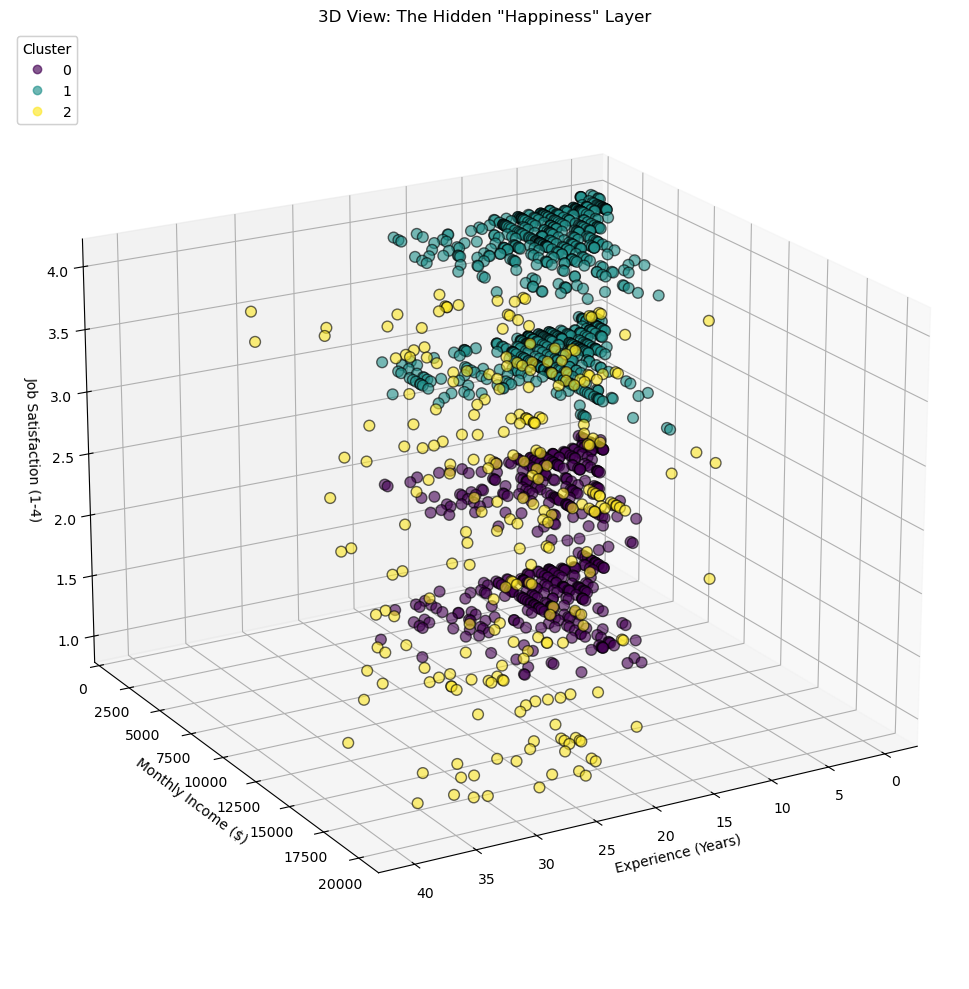


Analysis Complete. Check the plots to see the segmentation.


In [7]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(xs=df['TotalWorkingYears'],
                     ys=df['MonthlyIncome'],
                     zs=df['JobSatisfaction'],
                     c=df['Cluster'],
                     cmap='viridis',
                     s=60, alpha=0.6, edgecolor='k')

# Labels and Title
ax.set_xlabel('Experience (Years)')
ax.set_ylabel('Monthly Income ($)')
ax.set_zlabel('Job Satisfaction (1-4)')
ax.set_title('3D View: The Hidden "Happiness" Layer')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper left")
ax.add_artist(legend)

# Set camera angle
ax.view_init(elev=20, azim=60)

plt.tight_layout()
plt.show()

print("\nAnalysis Complete. Check the plots to see the segmentation.")